In [14]:
%matplotlib inline
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd

# Comparison of LSST gender balance with RAS demographics survey

## Assumptions:

* Assumes binary gender
* Only considered numbers in RAS demographics survey for Astronomy and Solar System Science
* Googled each person on 2018 LSST:UK AP list and assumed their position info is up to date

In [15]:
lsst_df = pd.read_csv('lsst_roles.csv')

In [16]:
lsst_df

,first_name,last_name,last_year,gender,role
0,Filipe,Abdalla,2020,m,slr
1,Omar,Almaini,2020,m,p
2,Farrukh,Azfar,2020,m,l
3,David,Bacon,2019,m,slr
4,Vasily,Belokurov,2019,m,slr
5,Malcolm,Bremer,2020,m,p
6,Sarah,Bridle,2019,f,p
7,Michael,Brown,2019,m,p
8,Erminia,Calabrese,2019,f,l
9,Michael,Childress,2018,m,l


### LSST AP data for 2018:
* Grabbed from the LSST:UK wiki. 
* Googled each person and assumed their position info is up to date:
 - p = Professor
 - slr = Senior Lecturer / Reader
 - l = Lecturer
* Only done this analysis for APs. As it was done by hand, too time consuming right now for JAs. Do we have demographics/position info saved for JA applicants?

### RAS demographics data

Total numbers for astro and solar system from Tables 1 and 3 of RAS demographics survey: https://www.ras.org.uk/images/stories/DemographicSurvey/2017/demographic_survey_full.pdf

* XXX\_astro = Astronomy
* XXX\_sss = Solar System Science

In [17]:
ras_tab_1 = pd.read_csv('ras_demos_tab1.csv', index_col=0, names=('n_astro', 'n_sss'), skiprows=[0])
ras_tab_3 = pd.read_csv('ras_demos_tab3.csv', index_col=0, names=('percent_f_astro', 'percent_f_sss'), skiprows=[0])


In [18]:
ras_tab_1

,n_astro,n_sss
prof,256,56
sl_r,165,47
lec,106,31


In [19]:
ras_tab_3

,percent_f_astro,percent_f_sss
prof,11.6,21.2
sl_r,18.2,22.2
lec,29.2,27.6


In [20]:
ras_numbers_df = ras_tab_1.join(ras_tab_3)

In [21]:
ras_numbers_df

,n_astro,n_sss,percent_f_astro,percent_f_sss
prof,256,56,11.6,21.2
sl_r,165,47,18.2,22.2
lec,106,31,29.2,27.6


In [22]:
ras_numbers_df['n_female_astro_round'] = np.around(ras_numbers_df['n_astro'] * (ras_numbers_df['percent_f_astro'] / 100.),0)
ras_numbers_df['n_female_sss_round'] = np.around(ras_numbers_df['n_sss'] * (ras_numbers_df['percent_f_sss'] / 100.),0)

In [23]:
ras_numbers_df

,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round
prof,256,56,11.6,21.2,30.0,12.0
sl_r,165,47,18.2,22.2,30.0,10.0
lec,106,31,29.2,27.6,31.0,9.0


Rounded to nearest whole number in n\_female\_XXX\_round so we're not dealing with fractions of people.

In [25]:
lsst_total_ap = len(lsst_df)
print(lsst_total_ap)

90


In [33]:
lsst_total_profs = np.sum(lsst_df.role =='p')
lsst_total_slr = np.sum(lsst_df.role =='slr')
lsst_total_l = np.sum(lsst_df.role =='l')

print(lsst_total_profs, lsst_total_slr, lsst_total_l)

40 31 19


In [41]:
lsst_female_profs = len(lsst_df[(lsst_df.role =='p') & (lsst_df.gender =='f')])
lsst_female_slr = len(lsst_df[(lsst_df.role =='slr') & (lsst_df.gender =='f')])
lsst_female_l = len(lsst_df[(lsst_df.role =='l') & (lsst_df.gender =='f')])




print(lsst_female_profs, lsst_female_slr, lsst_female_l)

7 2 6


In [43]:
lsst_pc_female_profs = lsst_female_profs / lsst_total_profs
lsst_pc_female_slr = lsst_female_slr / lsst_total_slr
lsst_pc_female_l = lsst_female_l / lsst_total_l


print(lsst_pc_female_profs, lsst_pc_female_slr, lsst_pc_female_l)

0.175 0.0645161290323 0.315789473684


# How to do a fair comparison?

## Adding together RAS numbers for Astro and Solar System science

* LSST:UK covers astro and sss
* Assuming that we should pull from the communities in the same fraction that they appear in the wild.
* Sum total number in each field/role in RAS demographics survey

In [44]:
ras_numbers_df['n_total_astro_sss'] = ras_numbers_df.n_astro + ras_numbers_df.n_sss
ras_numbers_df['n_female_total_astro_sss'] = ras_numbers_df.n_female_astro_round + ras_numbers_df.n_female_sss_round

In [45]:
ras_numbers_df

,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss
prof,256,56,11.6,21.2,30.0,12.0,312,42.0
sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0
lec,106,31,29.2,27.6,31.0,9.0,137,40.0


Now get those total numbers as percentage female

In [46]:
ras_numbers_df['percentage_female_astro_sss'] = ras_numbers_df.n_female_total_astro_sss / ras_numbers_df.n_total_astro_sss
ras_numbers_df

,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss
prof,256,56,11.6,21.2,30.0,12.0,312,42.0,0.134615
sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0,0.188679
lec,106,31,29.2,27.6,31.0,9.0,137,40.0,0.291971


These numbers should be a reasonable 'host population' to compare to the LSST:UK AP sample

In [54]:
comparison_df = ras_numbers_df.copy()

In [55]:
comparison_df['lsst_percent_female'] = [lsst_pc_female_profs, lsst_pc_female_slr, lsst_pc_female_l]
comparison_df['lsst_total_female'] = [lsst_female_profs, lsst_female_slr, lsst_female_l]

In [56]:
comparison_df

,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss,lsst_percent_female,lsst_total_female
prof,256,56,11.6,21.2,30.0,12.0,312,42.0,0.134615,0.175000,7
sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0,0.188679,0.064516,2
lec,106,31,29.2,27.6,31.0,9.0,137,40.0,0.291971,0.315789,6


What would the numbers be if we did match the RAS demographics?

In [57]:
comparison_df['lsst_total'] = [lsst_total_profs, lsst_total_slr, lsst_total_l]
comparison_df['lsst_predicted_number'] = np.around(comparison_df.percentage_female_astro_sss * comparison_df.lsst_total, 0)
comparison_df

,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss,lsst_percent_female,lsst_total_female,lsst_total,lsst_predicted_number
prof,256,56,11.6,21.2,30.0,12.0,312,42.0,0.134615,0.175000,7,40,5.0
sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0,0.188679,0.064516,2,31,6.0
lec,106,31,29.2,27.6,31.0,9.0,137,40.0,0.291971,0.315789,6,19,6.0


In [69]:
comparison_df.reset_index(inplace=True)

<Figure size 720x720 with 0 Axes>

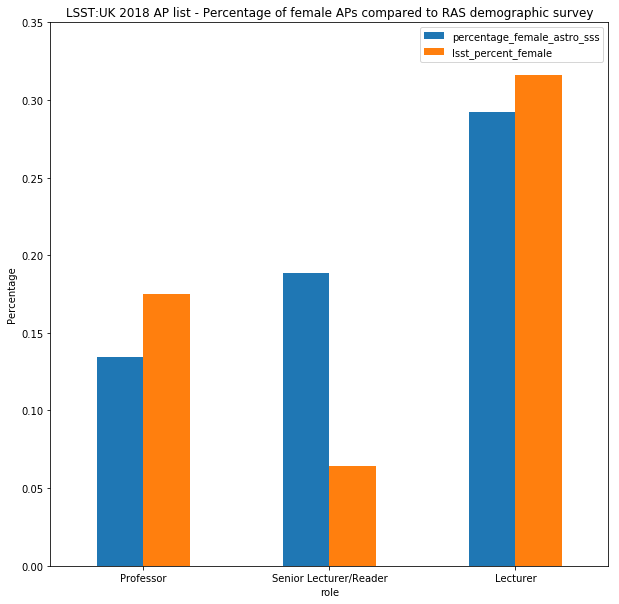

In [82]:
mp.figure(figsize=(10,10))
comparison_df[['percentage_female_astro_sss', 'lsst_percent_female']].plot.bar(x=comparison_df.role, figsize=(10,10), rot=0)

ind = np.arange(3)
mp.ylabel('Percentage')
mp.title('LSST:UK 2018 AP list - Percentage of female APs compared to RAS demographic survey')
mp.xticks(ind, ('Professor', 'Senior Lecturer/Reader', 'Lecturer'))
mp.yticks(np.arange(0, 0.4, 0.05))

mp.savefig('lsst_gender_balance_percentages.pdf')



<Figure size 720x720 with 0 Axes>

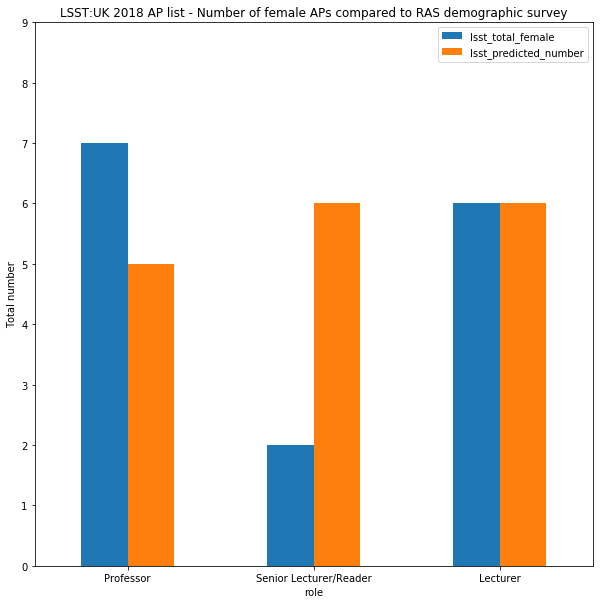

In [83]:
mp.figure(figsize=(10,10))
comparison_df[['lsst_total_female', 'lsst_predicted_number']].plot.bar(x=comparison_df.role, figsize=(10,10), rot=0)
ind = np.arange(3)
mp.ylabel('Total number')
mp.title('LSST:UK 2018 AP list - Number of female APs compared to RAS demographic survey')
mp.xticks(ind, ('Professor', 'Senior Lecturer/Reader', 'Lecturer'))
mp.yticks(np.arange(0, 10, 1))

mp.savefig('lsst_gender_balance_totals.pdf')

In [72]:
comparison_df['lsst_total_male'] = comparison_df.lsst_total - comparison_df.lsst_total_female
comparison_df

,role,n_astro,n_sss,percent_f_astro,percent_f_sss,n_female_astro_round,n_female_sss_round,n_total_astro_sss,n_female_total_astro_sss,percentage_female_astro_sss,lsst_percent_female,lsst_total_female,lsst_total,lsst_predicted_number,lsst_total_male
0,prof,256,56,11.6,21.2,30.0,12.0,312,42.0,0.134615,0.175000,7,40,5.0,33
1,sl_r,165,47,18.2,22.2,30.0,10.0,212,40.0,0.188679,0.064516,2,31,6.0,29
2,lec,106,31,29.2,27.6,31.0,9.0,137,40.0,0.291971,0.315789,6,19,6.0,13


<Figure size 720x720 with 0 Axes>

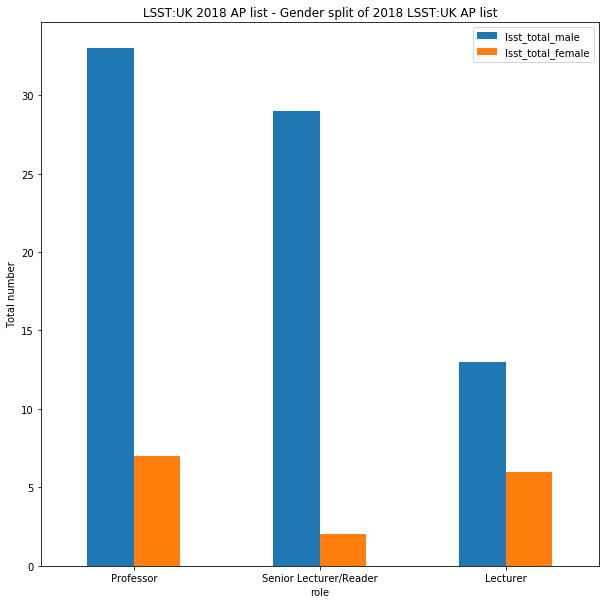

In [84]:
mp.figure(figsize=(10,10))
comparison_df[['lsst_total_male', 'lsst_total_female']].plot.bar(x=comparison_df.role, figsize=(10,10), rot=0)

ind = np.arange(3)
mp.ylabel('Total number')
mp.title('LSST:UK 2018 AP list - Gender split of 2018 LSST:UK AP list')
mp.xticks(ind, ('Professor', 'Senior Lecturer/Reader', 'Lecturer'))
mp.yticks(np.arange(0, 35, 5))

mp.savefig('lsst_gender_balance_mvf.pdf')

# Depreciated

In [65]:
lsst_df

,role,percent_female_astro_ras,percent__female_ss_ras,total_ras,n_female_lsst
0,prof,11.6,21.2,302,7
1,sl_or_reader,18.2,22.2,204,2
2,lec,29.2,27.6,135,5


In [31]:
lsst_df['n_female_astro_ras'] = (lsst_df.percent_female_astro_ras / 100.) * ras_total_astro

In [6]:
lsst_df['n_female_ss_ras'] = (lsst_df.percent__female_ss_ras / 100.) * ras_total_ss

In [7]:
lsst_df

,role,percent_female_astro_ras,percent__female_ss_ras,total_ras,n_female_lsst,n_female_astro_ras,n_female_ss_ras
0,prof,11.6,21.2,302,7,59.74,26.712
1,sl_or_reader,18.2,22.2,204,2,93.73,27.972
2,lec,29.2,27.6,135,5,150.38,34.776


In [8]:
total_astro_ss_ras = ras_total_astro + ras_total_ss
total_astro_ss_ras

641

In [9]:
lsst_df['ras_female_ss_astro_comb'] = lsst_df.n_female_astro_ras + lsst_df.n_female_ss_ras
lsst_df['ras_female_pc_astro_ss_comp'] = lsst_df.ras_female_ss_astro_comb / total_astro_ss_ras

In [10]:
lsst_df

,role,percent_female_astro_ras,percent__female_ss_ras,total_ras,n_female_lsst,n_female_astro_ras,n_female_ss_ras,ras_female_ss_astro_comb,ras_female_pc_astro_ss_comp
0,prof,11.6,21.2,302,7,59.74,26.712,86.452,0.134871
1,sl_or_reader,18.2,22.2,204,2,93.73,27.972,121.702,0.189863
2,lec,29.2,27.6,135,5,150.38,34.776,185.156,0.288855


In [11]:
lsst_total = 90.

In [12]:
lsst_df['percent_female_lsst'] = lsst_df.n_female_lsst / lsst_total

In [13]:
lsst_df

,role,percent_female_astro_ras,percent__female_ss_ras,total_ras,n_female_lsst,n_female_astro_ras,n_female_ss_ras,ras_female_ss_astro_comb,ras_female_pc_astro_ss_comp,percent_female_lsst
0,prof,11.6,21.2,302,7,59.74,26.712,86.452,0.134871,0.077778
1,sl_or_reader,18.2,22.2,204,2,93.73,27.972,121.702,0.189863,0.022222
2,lec,29.2,27.6,135,5,150.38,34.776,185.156,0.288855,0.055556


In [14]:
lsst_df.set_index(['role'])

,percent_female_astro_ras,percent__female_ss_ras,total_ras,n_female_lsst,n_female_astro_ras,n_female_ss_ras,ras_female_ss_astro_comb,ras_female_pc_astro_ss_comp,percent_female_lsst
role,,,,,,,,,
prof,11.6,21.2,302,7,59.74,26.712,86.452,0.134871,0.077778
sl_or_reader,18.2,22.2,204,2,93.73,27.972,121.702,0.189863,0.022222
lec,29.2,27.6,135,5,150.38,34.776,185.156,0.288855,0.055556


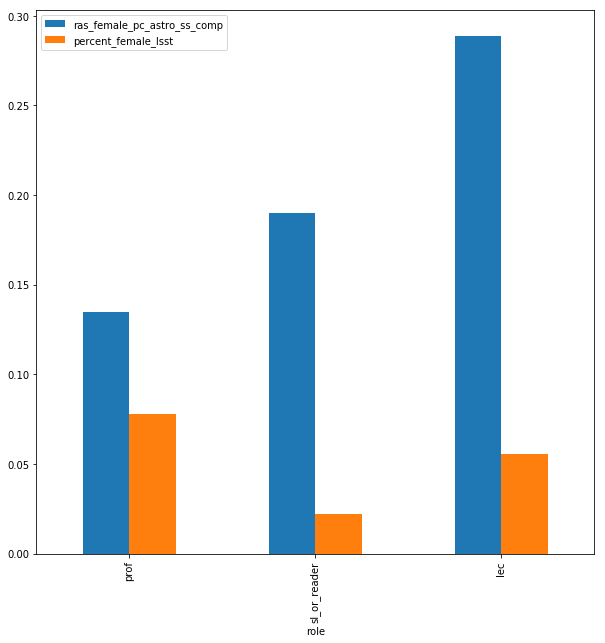

In [15]:
mp.figure(figsize=(10,10))
lsst_df[['ras_female_pc_astro_ss_comp', 'percent_female_lsst']].plot.bar(x=lsst_df.role, figsize=(10,10))
mp.savefig('lsst_gender_balance.pdf')